In [24]:
# really not working ? could be that the nn needs more data - try again with
# larger training set

import sys
sys.path.append("/Users/david/Documents/mastersCode/ubm")
print(sys.path)

['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug', '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev', '/Users/david/Documents/mastersCode/ubm/classifiers/hmm_nn/dnnhmm/development', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm', '/Users/david/Documents/mastersCode/ubm']


In [2]:
from importlib import reload
import audio_datastore.audio_datastore as myads
reload(myads)
from importlib import reload
from collections import Counter
import pickle
import time

Using cache found in /Users/david/.cache/torch/hub/snakers4_silero-vad_master
Using cache found in /Users/david/.cache/torch/hub/snakers4_silero-vad_master


In [3]:
from data.pitch_tracking_database.load_data import *
speech_pitch_tracking_db = pickle.load(open(normalised_30,'rb'))
ads = speech_pitch_tracking_db['ads']

In [13]:
# split ads
developmentLabels = ["M03","M04","M05","M06","M07","M08","M09","M10","F05","F06","F07","F08","F09","F10",
                     "F03","F04"]
evaluationLabels = ["M01","M02","F01","F02"]
adsTrain = myads.subset(ads, developmentLabels)
adsEvaluate = myads.subset(ads, evaluationLabels)
numFilesPerSpeakerForEnrollment = 20
adsEnroll, adsDet = myads.split(adsEvaluate, numFilesPerSpeakerForEnrollment)
adsTest = adsDet
# adsDet, adsTest = myads.split(adsDet, 2)
# adsTrain.info('Train')
adsEnroll.info('Enroll')
adsTest.info('Test')

Enroll database info: 
dict_keys(['F01', 'F02', 'M01', 'M02'])
dict_values([20, 20, 20, 20])


Test database info: 
dict_keys(['F01', 'F02', 'M01', 'M02'])
dict_values([10, 10, 10, 10])




In [14]:
from classifiers.classifier_base import ClassifierBase
from my_torch.tuts2.torch_transforms import ComposeTransform

def test_classifiers(ads_train, ads_test, classifiers: [ClassifierBase], verbose=False):
    index = 1
    if verbose:
        print('running all')

    for classifier in classifiers:
        if verbose:
            print('\n')
            print('test #', index)
        print(classifier.info)

        classifier.train(ads_train)
        classifier.test_all(ads_test)
        index = index + 1
        if verbose:
            print('\n')

In [21]:
import classifiers.hmm_nn.dnnhmm.classifier_dnn_hmm as classifier_dnn_hmm
reload(classifier_dnn_hmm)

import my_torch.tuts2.torch_transforms as torch_t
reload(torch_t)
import feature_extraction.fe_spafe.fe_spafe as fe_methods
reload(fe_methods)
# from feature_extraction.fe_spafe.fe_spafe import FeatureExtractorLogMel

# define fe methods

fe_mfcc = fe_methods.FeatureExtractorMfcc()
fe_mfcc.set_normalisation(adsDet)

In [22]:
# define classifiers

classifier_a = classifier_dnn_hmm.ClassifierHMMDNN(
    train_process=torch_t.ComposeProcessTransform([]),
    test_process=torch_t.ComposeProcessTransform([]),
    fe_method=torch_t.ComposeTransform([
    fe_mfcc,
    ]),
    info='base log mel no augmentation'
)

running all


test # 1
base log mel no augmentation
Iteration 1, loss = 0.52466031
Validation score: 0.930147
Iteration 2, loss = 0.18236137
Validation score: 0.943015
Iteration 3, loss = 0.12307818
Validation score: 0.950368
Iteration 4, loss = 0.09269840
Validation score: 0.948529
Iteration 5, loss = 0.07157302
Validation score: 0.957721
Iteration 6, loss = 0.06016759
Validation score: 0.954044
Iteration 7, loss = 0.04733019
Validation score: 0.965074
Iteration 8, loss = 0.03881012
Validation score: 0.961397
Iteration 9, loss = 0.03026363
Validation score: 0.963235
Iteration 10, loss = 0.02432772
Validation score: 0.959559
Iteration 11, loss = 0.01938744
Validation score: 0.963235
Iteration 12, loss = 0.01517494
Validation score: 0.968750
Iteration 13, loss = 0.01109818
Validation score: 0.966912
Iteration 14, loss = 0.01232086
Validation score: 0.966912
Iteration 15, loss = 0.01289565
Validation score: 0.965074
Iteration 16, loss = 0.00949164
Validation score: 0.968750
Iteration 17,

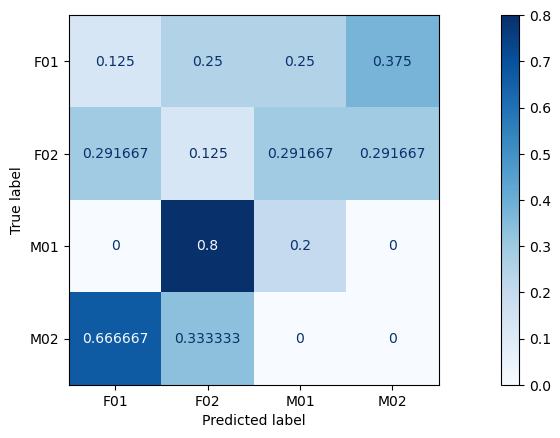

In [23]:
test_classifiers(adsEnroll, adsTest, [classifier_a], verbose=True)